**Data Science Assignment: eCommerce Transactions Dataset**

***EDA of eCommerce Transactions***

In [93]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

import scipy.stats as stats

import seaborn as sns

In [94]:
customers = pd.read_csv("Customers.csv")
og_c = customers.copy()
products = pd.read_csv("Products.csv")
og_p = products.copy()
transactions = pd.read_csv("Transactions.csv")
og_t = transactions.copy()

In [95]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [96]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [97]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [98]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [99]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [100]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [101]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [102]:
transactions.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00992,C0109,P059,2024-04-21 10:52:24,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [103]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [104]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [105]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


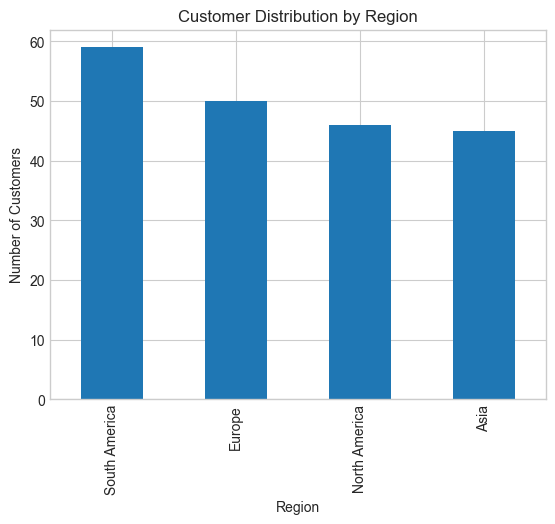

In [106]:
region_counts = customers['Region'].value_counts()
print("Customer Distribution by Region:")
print(region_counts)

# Visualization (if needed)
import matplotlib.pyplot as plt

region_counts.plot(kind='bar', title="Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


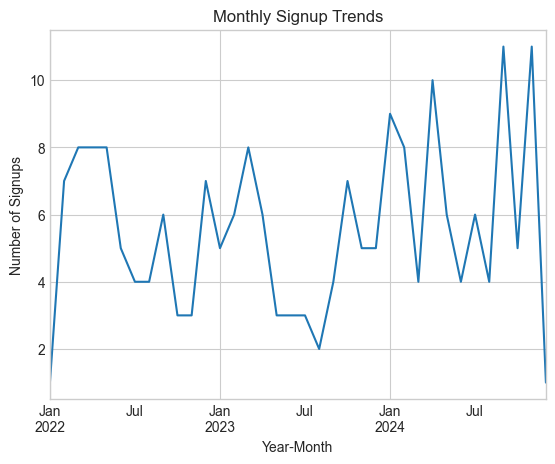

In [107]:
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

signup_trends = customers['SignupYearMonth'].value_counts().sort_index()

signup_trends.plot(kind='line', title="Monthly Signup Trends")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.show()


In [108]:
duplicates = customers[customers.duplicated()]
print("Duplicate Rows in Customers DataFrame:")
print(duplicates)

Duplicate Rows in Customers DataFrame:
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate, SignupYearMonth]
Index: []


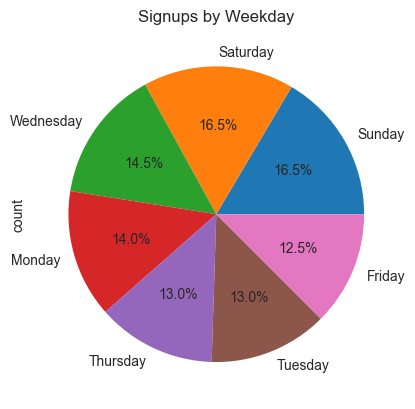

In [109]:
customers['SignupWeekday'] = customers['SignupDate'].dt.day_name()
weekday_counts = customers['SignupWeekday'].value_counts()

weekday_counts.plot(kind='pie', title="Signups by Weekday", autopct='%1.1f%%')
plt.show()


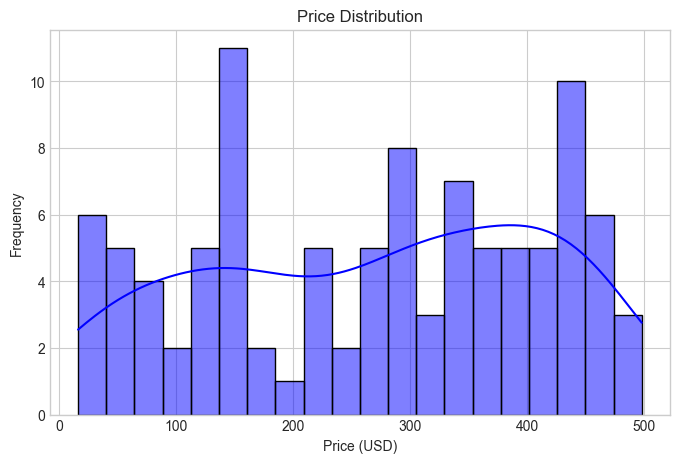

In [110]:
# Plotting the price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


In [111]:
category_counts = products['Category'].value_counts()
print("Product Count by Category:")
print(category_counts)


Product Count by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [112]:
avg_price_by_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("Average Price by Category:")
print(avg_price_by_category)


Average Price by Category:
Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


In [113]:
q1 = products['Price'].quantile(0.25)
q3 = products['Price'].quantile(0.75)
iqr = q3 - q1

# Outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtering outliers
outliers = products[(products['Price'] < lower_bound) | (products['Price'] > upper_bound)]
print("Price Outliers:")
print(outliers)


Price Outliers:
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [114]:
common_products = products.groupby('Category')['ProductName'].value_counts().head(10)
print("Most Common Products by Category:")
print(common_products)


Most Common Products by Category:
Category  ProductName            
Books     BookWorld Biography        3
          SoundWave Cookbook         3
          ActiveWear Textbook        2
          BookWorld Cookbook         2
          ComfortLiving Biography    2
          SoundWave Mystery Book     2
          SoundWave Novel            2
          TechPro Novel              2
          TechPro Textbook           2
          ActiveWear Biography       1
Name: count, dtype: int64


In [115]:
unique_products_with_count = products.groupby('Category')['ProductName'].value_counts().reset_index(name='Count')
print("Unique Products per Category with Count:")
print(unique_products_with_count)


Unique Products per Category with Count:
      Category              ProductName  Count
0        Books      BookWorld Biography      3
1        Books       SoundWave Cookbook      3
2        Books      ActiveWear Textbook      2
3        Books       BookWorld Cookbook      2
4        Books  ComfortLiving Biography      2
..         ...                      ...    ...
61  Home Decor        ComfortLiving Rug      1
62  Home Decor   HomeSense Cookware Set      1
63  Home Decor       HomeSense Wall Art      1
64  Home Decor            SoundWave Rug      1
65  Home Decor              TechPro Rug      1

[66 rows x 3 columns]


In [116]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [117]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [118]:
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

revenue_by_product = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Product:")
print(revenue_by_product)

revenue_by_customer = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Customer:")
print(revenue_by_customer)


Total Revenue: $689995.56
Revenue by Product:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
          ...   
P070      730.35
P073      647.76
P014      367.64
P056      337.68
P044      244.66
Name: TotalValue, Length: 100, dtype: float64
Revenue by Customer:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0014      318.66
C0151      223.96
C0097      137.54
C0033      132.64
C0060       82.36
Name: TotalValue, Length: 199, dtype: float64


In [119]:
top_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("Top Selling Products by Quantity:")
print(top_selling_products)


Top Selling Products by Quantity:
ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
        ..
P044    13
P060    13
P024    12
P099    11
P031     9
Name: Quantity, Length: 100, dtype: int64


In [120]:
high_value_customers = revenue_by_customer[revenue_by_customer > 1000]
print("High Value Customers (Spending > $1000):")
print(high_value_customers)


High Value Customers (Spending > $1000):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0119     1191.61
C0094     1166.97
C0015     1157.48
C0043     1131.32
C0080     1007.52
Name: TotalValue, Length: 181, dtype: float64


Monthly Revenue:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


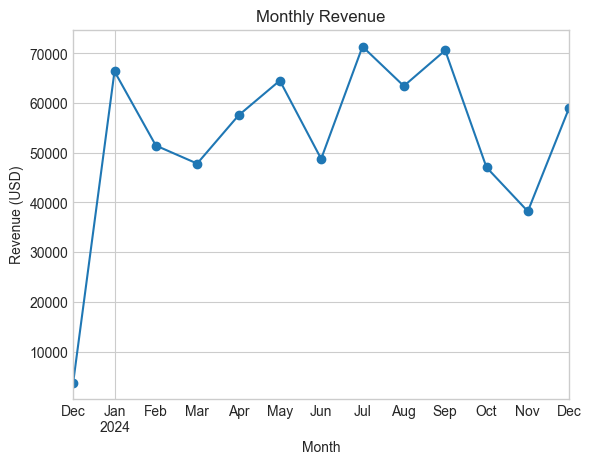

In [121]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
import matplotlib.pyplot as plt

monthly_revenue.plot(kind='line', title='Monthly Revenue', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()


In [122]:
# Merge Products + Transactions
prod_trans = transactions.merge(products, on="ProductID", how="left")

# Merge with Customers
full_data = prod_trans.merge(customers, on="CustomerID", how="left")

# Save combined data for further analysis
full_data.to_csv("combined_data.csv", index=False)

C:\Users\jaysh\AppData\Local\Temp\ipykernel_10672\1585908106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


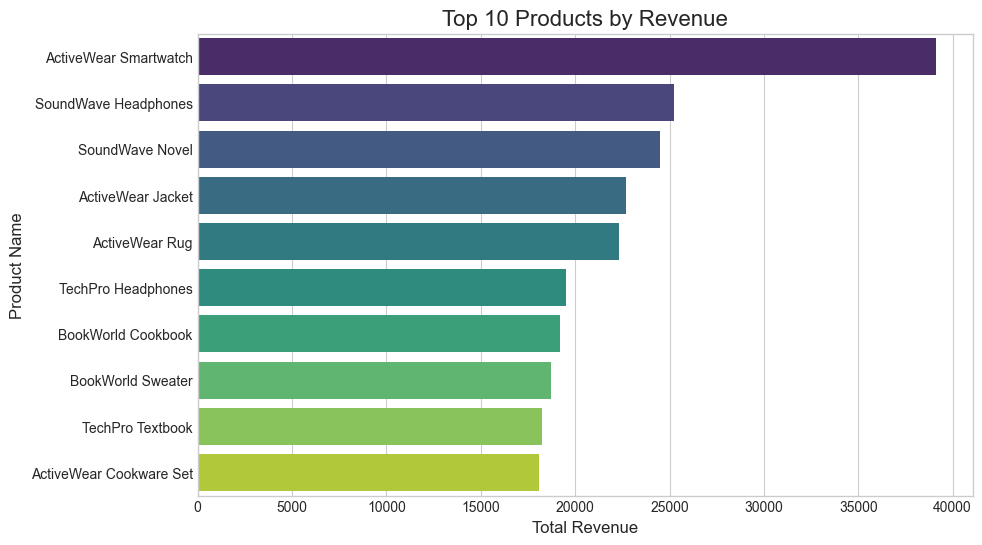

In [123]:

# Top 10 products by revenue
top_products = full_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()


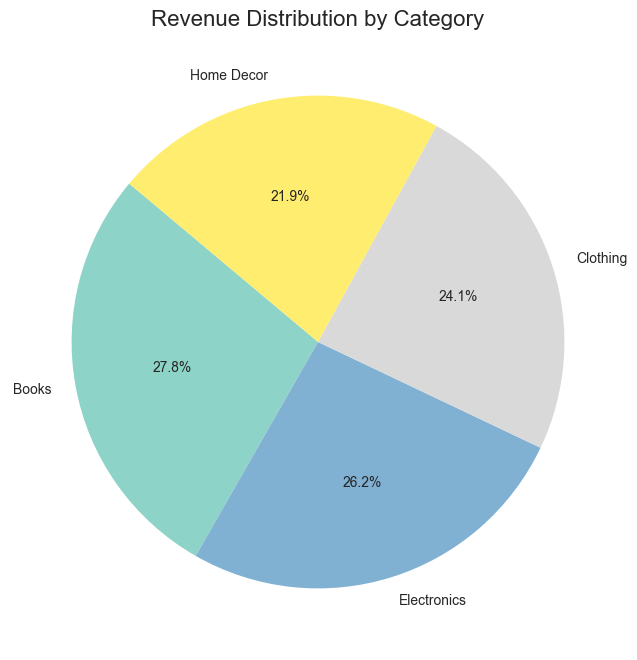

In [124]:
# Revenue by Category
category_sales = full_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

# Pie Chart
plt.figure(figsize=(8, 8))
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set3")
plt.title("Revenue Distribution by Category", fontsize=16)
plt.ylabel("")  # Hide default label
plt.show()


C:\Users\jaysh\AppData\Local\Temp\ipykernel_10672\2272374553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


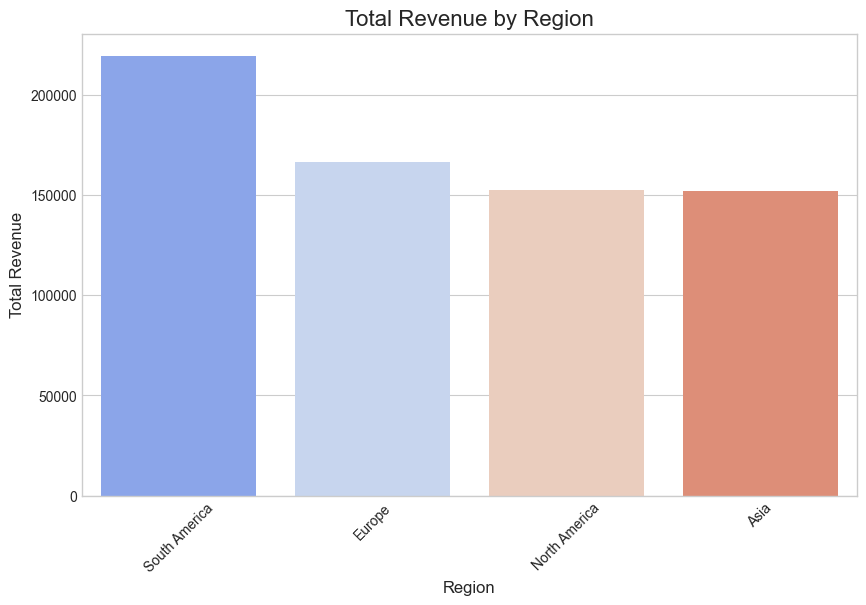

In [125]:
# Revenue by Region
region_sales = full_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Total Revenue by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()


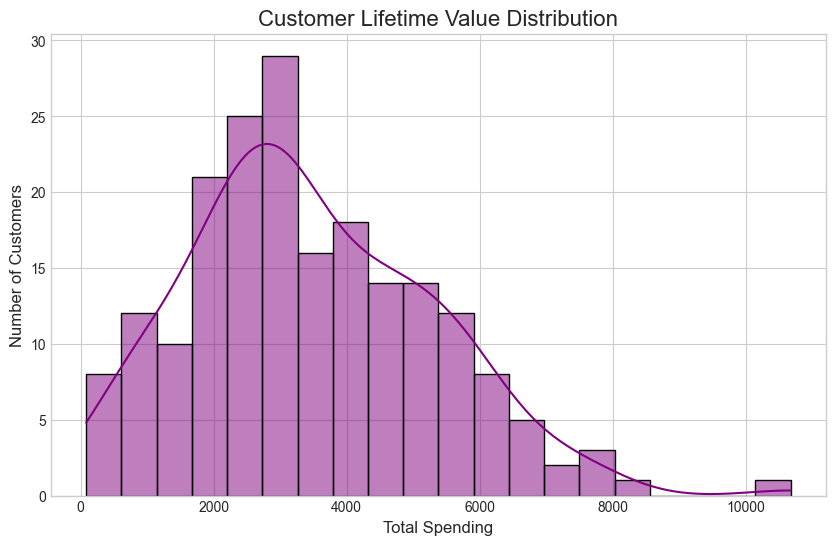

In [126]:
# Customer Lifetime Value
clv = full_data.groupby("CustomerID")["TotalValue"].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(clv, bins=20, kde=True, color="purple")
plt.title("Customer Lifetime Value Distribution", fontsize=16)
plt.xlabel("Total Spending", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()


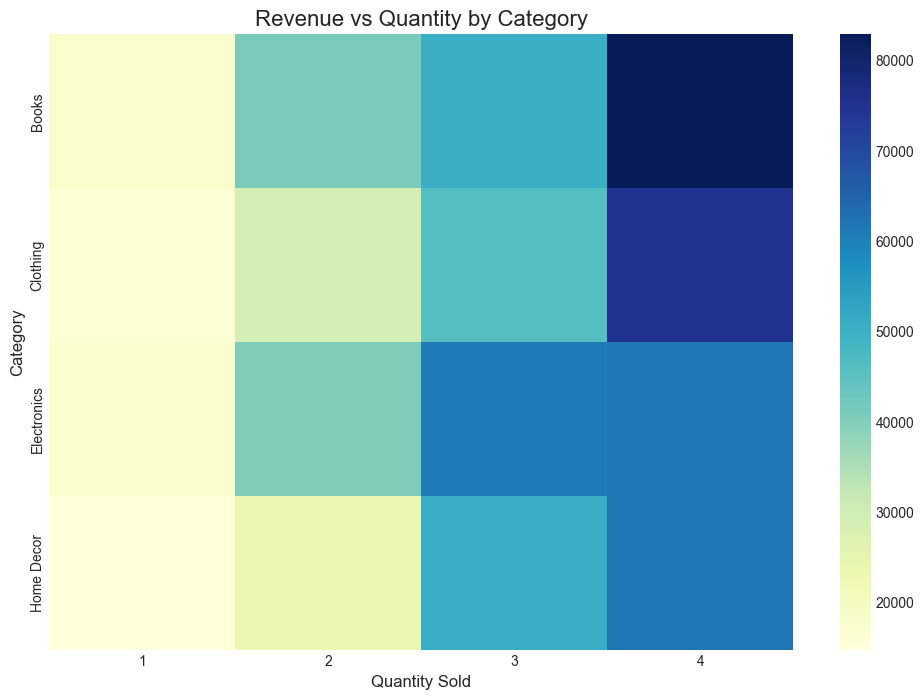

In [127]:
# Create pivot table
category_heatmap = full_data.pivot_table(
    index="Category", columns="Quantity", values="TotalValue", aggfunc="sum", fill_value=0
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(category_heatmap, cmap="YlGnBu", annot=False)
plt.title("Revenue vs Quantity by Category", fontsize=16)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()


C:\Users\jaysh\AppData\Local\Temp\ipykernel_10672\2783566186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_analysis.index, y=repeat_analysis.values, palette="magma")


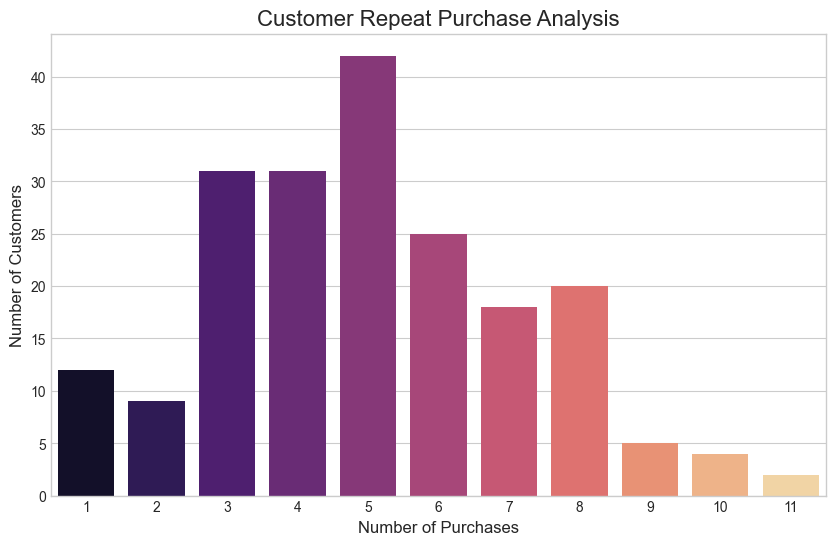

In [128]:
# Customer Repeat Analysis
repeat_customers = full_data.groupby("CustomerID")["TransactionID"].count()
repeat_analysis = repeat_customers.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=repeat_analysis.index, y=repeat_analysis.values, palette="magma")
plt.title("Customer Repeat Purchase Analysis", fontsize=16)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()


In [131]:
# Monthly Revenue
monthly_sales = full_data.groupby(["Year", "Month"])["TotalValue"].sum().reset_index()

# Correct Date column creation
monthly_sales["Date"] = pd.to_datetime(monthly_sales[["Year", "Month"]].assign(Day=1))

# Plot using Plotly
import plotly.express as px

fig = px.line(monthly_sales, x="Date", y="TotalValue", title="Monthly Sales Trend", markers=True)
fig.update_layout(xaxis_title="Date", yaxis_title="Total Revenue", template="plotly_dark")
fig.show()


In [132]:
# Top-selling products
top_products = full_data.groupby("ProductName").agg(
    total_quantity=("Quantity", "sum"),
    total_revenue=("TotalValue", "sum")
).sort_values(by="total_revenue", ascending=False)

# Bottom-selling products
bottom_products = top_products.tail(10)

print("Top Products:\n", top_products.head())
print("Bottom Products:\n", bottom_products)


Top Products:
                        total_quantity  total_revenue
ProductName                                         
ActiveWear Smartwatch             100       39096.97
SoundWave Headphones               97       25211.64
SoundWave Novel                    58       24507.90
ActiveWear Jacket                  76       22712.56
ActiveWear Rug                     79       22314.43
Bottom Products:
                              total_quantity  total_revenue
ProductName                                               
ActiveWear Biography                     18        3047.40
HomeSense Headphones                     18        2860.74
BookWorld Bluetooth Speaker              19        2790.15
ComfortLiving Headphones                 15        2394.00
BookWorld Rug                            18        1722.42
ComfortLiving Desk Lamp                  26        1694.16
SoundWave Bluetooth Speaker              19        1223.22
ComfortLiving Rug                        19        1063.81
Active

In [133]:
# Monthly sales trend
monthly_sales = full_data.groupby(["Year", "Month"])["TotalValue"].sum().reset_index()
monthly_sales["Date"] = pd.to_datetime(monthly_sales[["Year", "Month"]].assign(Day=1))

print("Monthly Sales Trend:\n", monthly_sales.sort_values("Date", ascending=False))


Monthly Sales Trend:
     Year  Month  TotalValue       Date
12  2024     12    59049.20 2024-12-01
11  2024     11    38224.37 2024-11-01
10  2024     10    47063.22 2024-10-01
9   2024      9    70603.75 2024-09-01
8   2024      8    63436.74 2024-08-01
7   2024      7    71366.39 2024-07-01
6   2024      6    48771.18 2024-06-01
5   2024      5    64527.74 2024-05-01
4   2024      4    57519.06 2024-04-01
3   2024      3    47828.73 2024-03-01
2   2024      2    51459.27 2024-02-01
1   2024      1    66376.39 2024-01-01
0   2023     12     3769.52 2023-12-01


In [134]:
# Region-wise sales
region_sales = full_data.groupby("Region").agg(
    total_revenue=("TotalValue", "sum"),
    total_transactions=("TransactionID", "count")
).sort_values(by="total_revenue", ascending=False)

print("Region-Wise Sales:\n", region_sales)


Region-Wise Sales:
                total_revenue  total_transactions
Region                                          
South America      219352.56                 304
Europe             166254.63                 234
North America      152313.40                 244
Asia               152074.97                 218


In [135]:
# Customer lifetime value
clv = full_data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_transactions=("TransactionID", "count")
).sort_values(by="total_spent", ascending=False)

print("Top Customers:\n", clv.head())


Top Customers:
             total_spent  total_transactions
CustomerID                                 
C0141          10673.87                  10
C0054           8040.39                   8
C0065           7663.70                  10
C0156           7634.45                  11
C0082           7572.91                   7
